In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns #grafics
import matplotlib.pyplot as plt #grafics

In [2]:
import warnings
warnings.filterwarnings("ignore")

# BBDD

In [3]:
df=pd.read_csv("C:/Users/csc/Documents/GEA/4t-GEA/Practiques/DEFINITIUS_marcadors/datan_peris.csv")
df.drop(["Unnamed: 0"],axis=1,inplace=True) #borrem var index
df

,group_dx,age,sex,years_schooling,educational_level,physical_exercise,socioeconomic_status,medical_psychiatric_history,weeks_sick_leave,current_sick_leave,...,ROCF_copy,ROCF_delayed,dig_symbol_sustitution,FLUENCY_phonemic,FLUENCY_semantic,WCST_categories,WCST_perseverative_error,BDNF,protein_carbonyl,glutathione
0,1,61,2,12,3.0,0.0,0,1,0.0,0.0,...,29.0,5.0,56.0,45,25.0,2,46,1.865096,2.795876,2.605101
1,1,58,2,16,4.0,2.0,0,2,0.0,0.0,...,33.0,16.0,65.0,40,25.0,6,11,NaN,NaN,NaN
2,1,60,2,16,4.0,0.0,0,2,0.0,0.0,...,29.0,12.0,58.0,35,18.0,5,24,1.158458,2.358763,1.191607
3,1,60,2,10,2.0,0.0,0,2,4.0,0.0,...,23.0,8.0,39.0,29,17.0,2,44,1.179872,1.822680,2.290991
4,1,55,1,16,4.0,1.0,0,2,0.0,0.0,...,33.0,18.0,68.0,43,22.0,6,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2,50,1,17,NaN,1.0,0,1,NaN,NaN,...,36.0,24.0,73.0,54,24.0,6,4,NaN,NaN,NaN
169,2,44,2,15,NaN,1.0,0,1,NaN,NaN,...,28.0,14.0,55.0,33,18.0,6,18,NaN,NaN,NaN
170,2,35,2,12,NaN,2.0,0,2,NaN,NaN,...,30.0,19.0,72.0,31,20.0,5,15,NaN,NaN,NaN
171,2,30,2,12,NaN,0.0,2,1,NaN,NaN,...,28.0,20.0,85.0,30,22.0,6,16,NaN,NaN,NaN


## Obviem tests funcionals

In [4]:
df_noclinic=df.drop(["current_living_situation","educational_level","socioeconomic_status" ,"CRASH_total_education","CRASH_total_occupation","CRASH_total_intellectual_leisure" ,"TOTAL_CRASH" ,"WCST_categories"], axis=1)

# Pre-processing

## Missings

In [5]:
print("count of NULL values before imputation\n")
df_noclinic.isnull().sum()

#majoria de NAs son dels bipolars

count of NULL values before imputation



group_dx                        0
age                             0
sex                             0
years_schooling                 0
physical_exercise              12
medical_psychiatric_history     0
weeks_sick_leave               74
current_sick_leave             72
age_illness_onset              32
depre_episodes                 32
number_hospitalitzations       32
clinical_stability             37
history_psychotic_symp         32
seasonal_pattern               33
rapid_cycling                  32
history_suicidal_ideation      32
num_attempts                   46
severity_attempt               67
family_hist_psychiatric        46
family_hist_suicide            72
TOTAL_HDRS                      0
TOTAL_FAST                      0
T_vocab                         0
block_design                   72
CVLT_trial1                    27
CVLT_trial5                     0
CVLT_total                      0
CVLT_delayed                    0
DIGIT_forward                   0
DIGIT_backward

### Obviem bipolars

In [6]:
df_noclnob=df_noclinic[df_noclinic.group_dx.isin([1,0])]
#print("count of NULL values before imputation without bipolars\n")
#df_noclnob.isnull().sum()#observem missings sense BIPOLARS

### Eliminem les 2 variables cognitives 

In [7]:
#eliminarem DIG_SYMBOL_SUBSTITUTION i BLOCK_DESIGN

df_noclbb=df_noclnob.drop(["dig_symbol_sustitution","block_design"], axis=1)

## Escala logaritmica glutathione

<AxesSubplot:xlabel='glutathione', ylabel='Count'>

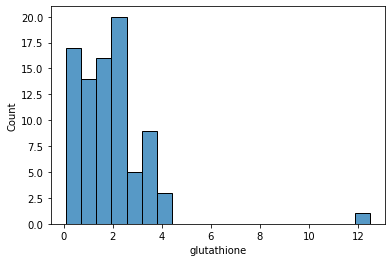

In [8]:
sns.histplot(df_noclbb["glutathione"])

In [9]:
#passarem a escala logaritmica el glutathione
import math
df_noclbb.glutathione=np.log10(df_noclbb.glutathione)
#df_noclbb

<AxesSubplot:xlabel='glutathione', ylabel='Count'>

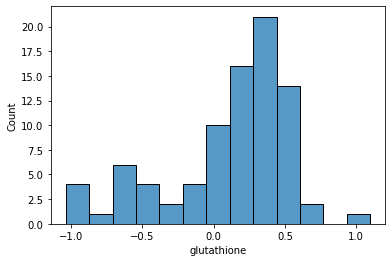

In [10]:
sns.histplot(df_noclbb["glutathione"])

<AxesSubplot:xlabel='group_dx', ylabel='glutathione'>

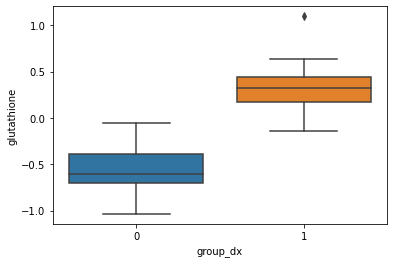

In [11]:
#sns.distplot(df_noclbb["glutathione"])
sns.boxplot(x="group_dx",y="glutathione",data=df_noclbb)

## Codifiquem la variable resposta

**Es classifica els pacients que tenen una Hamilton més elevada de 7 en remissió parcial, i la resta (HAM-D <7) en remissió clínica. Els controls s'agrupen en una tercera categoria.**

In [11]:
df_noclbb["hdrs_cod"]=0

In [12]:
df_noclbb.hdrs_cod.loc[df_noclbb.TOTAL_HDRS>7]=2
df_noclbb.hdrs_cod.loc[df_noclbb.TOTAL_HDRS<=7]=1
df_noclbb.hdrs_cod.loc[df_noclbb.group_dx==0]=0

In [13]:
dictia={0:"control", 1:"rem.clinica", 2:"rem.parcial"}

dictib={"control":0, "rem.clinica":1, "rem.parcial":2}
#dict
df_noclbb.hdrs_cod = df_noclbb["hdrs_cod"].map(dictia)#.astype("category")

In [14]:
df_noclbb["hdrs_cod"]

0      rem.clinica
1      rem.parcial
2      rem.clinica
3      rem.parcial
4      rem.clinica
          ...     
128        control
129        control
130        control
131        control
132        control
Name: hdrs_cod, Length: 121, dtype: object

#### Fem dummies les variables categòriques *sex*, *medical_psychiatric_history* 

In [15]:
sx={1:0, 2:1} #male - female
df_noclbb.sex = df_noclbb["sex"].map(sx)#.astype("category")

In [16]:
med={2:0, 1:1} #no - yes
df_noclbb.medical_psychiatric_history = df_noclbb["medical_psychiatric_history"].map(med)#.astype("category")

df_noclbb["medical_psychiatric_history"]

0      1
1      0
2      0
3      0
4      0
      ..
128    0
129    1
130    0
131    0
132    1
Name: medical_psychiatric_history, Length: 121, dtype: int64

## Separem output i input
**Evitem "manipulació" a l'hora d'imputar els casos: que no es vegin afectades per la variable output grup**
- Prescindim de la variable FAST per la gran correlació que presenta amb la variable resposta

In [17]:
y=df_noclbb.loc[:,"hdrs_cod"]
group=df_noclbb.loc[:,"group_dx"]
fast=df_noclbb.loc[:,"TOTAL_FAST"]

np.unique(y, return_counts=True)

(array(['control', 'rem.clinica', 'rem.parcial'], dtype=object),
 array([32, 57, 32], dtype=int64))

In [18]:
df_noclb=df_noclbb.drop(["group_dx", "TOTAL_HDRS", "hdrs_cod", "TOTAL_FAST"], axis=1)

## Separem train i test

In [19]:
from sklearn.model_selection import train_test_split # split into train/test sets
import random

random.seed(44)
trainxxx, testxxx, trainy, testy = train_test_split(df_noclb, y, test_size=0.2, random_state=2, stratify=y)

**Obviem les dades clíniques però les guardem per després poder modelar patients.**

In [20]:
train_cl=trainxxx[["weeks_sick_leave","current_sick_leave","age_illness_onset","depre_episodes","number_hospitalitzations","clinical_stability","history_psychotic_symp","seasonal_pattern","rapid_cycling","history_suicidal_ideation","num_attempts","severity_attempt","family_hist_psychiatric","family_hist_suicide"]]
test_cl=testxxx[["weeks_sick_leave","current_sick_leave","age_illness_onset","depre_episodes","number_hospitalitzations","clinical_stability","history_psychotic_symp","seasonal_pattern","rapid_cycling","history_suicidal_ideation","num_attempts","severity_attempt","family_hist_psychiatric","family_hist_suicide"]]

In [21]:
trainxxx.drop(["weeks_sick_leave","current_sick_leave","age_illness_onset","depre_episodes","number_hospitalitzations","clinical_stability","history_psychotic_symp","seasonal_pattern","rapid_cycling","history_suicidal_ideation","num_attempts","severity_attempt","family_hist_psychiatric","family_hist_suicide"], axis=1, inplace=True)

In [22]:
testxxx.drop(["weeks_sick_leave","current_sick_leave","age_illness_onset","depre_episodes","number_hospitalitzations","clinical_stability","history_psychotic_symp","seasonal_pattern","rapid_cycling","history_suicidal_ideation","num_attempts","severity_attempt","family_hist_psychiatric","family_hist_suicide"], axis=1, inplace=True)

## Preprocessing pipeline 

**Afegim un pipeline amb les funcions preprocessing necessaries que ja estiguin entrenades**:
- Transformació logaritmica del glutathione **(es fa directament al validate)**
- Estandaritzar puntuacions
- Imputació missings: MULTIVARIATE REGRESSION MISSINGS IMPUTER https://scikit-learn.org/stable/modules/impute.html, https://stackoverflow.com/questions/47689825/missing-values-imputation-in-python
     - at each step, a feature column is designated as output y
     - and the other feature columns are treated as inputs X
    
   

*As all pipeline steps, first calls the **.fit()** method and then the **.transform()** method on the training set but only .transform() on the test set*

*https://medium.com/analytics-vidhya/how-to-apply-preprocessing-steps-in-a-pipeline-only-to-specific-features-4e91fe45dfb8*

*https://medium.com/swlh/data-preprocessing-and-data-modeling-for-kaggle-house-price-prediction-data-in-python-c04055ded258*

In [23]:
from sklearn.compose import ColumnTransformer
import math
####ESCALEM LES PUNTUACIONS
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/impute.html
#https://stackoverflow.com/questions/47689825/missing-values-imputation-in-python

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  #MULTIVARIATE REGRESSION MISSINGS IMPUTER

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [24]:
puntuation_features=["T_vocab","CVLT_trial1","CVLT_trial5","CVLT_total","CVLT_delayed", "DIGIT_forward","DIGIT_backward", "TMTA_sec", "TMTB_sec", "ROCF_copy", "ROCF_delayed","FLUENCY_phonemic","FLUENCY_semantic","WCST_perseverative_error"]

In [25]:
scale=ColumnTransformer(
   [
       #("impute",IterativeImputer(max_iter=10, random_state=0), features),
       ("scale_puntuation",StandardScaler(), puntuation_features)#np.array(range(5,20)))
 ],
 remainder="passthrough"#"drop"les que no s'anomenen no sortiran 
)

In [26]:
pipeline=Pipeline(steps=[("scale",scale), 
                         ("imputation",IterativeImputer(max_iter=10, random_state=0))
                        ])#, ("model",clf)])

Entrenem i transformem el **pipeline de preprocessing** pel conjunt trainx i simplement transformem les dades del conjunt testx. Tornem a col.locar els indexs corresponents (al fer el pipeline es converteix en un array on els seus index son de 0 a 80)

In [27]:
idtrain_row=trainxxx.index.values
idtest_row=testxxx.index.values

In [28]:
trainx=pd.DataFrame(pipeline.fit_transform(trainxxx))
print("dim train input",trainx.shape)

trainx.index=idtrain_row

dim train input (96, 22)


In [29]:
testx=pd.DataFrame(pipeline.transform(testxxx))
print("dim test inpu",testx.shape)

testx.index=idtest_row

dim test inpu (25, 22)


Unim tot el conjunt per guardar la base de dades preprocessada

In [30]:
x=pd.concat([trainx, testx], axis=0, ignore_index=True)
x.columns=["Estimated IQ","Verbal learning (trial 1)","Verbal learning (trial 5)","Verbal learning (total)","Verbal learning (delayed)", "Digit forward","Digit backward", "Trail Making Test A", 
                       "Trail Making Test B", "Complex figure copy", "Complex figure delayed","Phonemic fluency","Semantic fluency","WCST perseverative error",
               "Age", "Sex", "Years schooling", "Physical exercise", "Medical psychiatric history", "BDNF", "Protein carbonyl", "Glutathione"]
y=pd.concat([trainy, testy], axis=0, ignore_index=True)

data=pd.concat([y,x], axis=1)
data.to_csv('data.csv', header=True, index=False)


# Modelització

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

####REGRESIO LOGISTICA
from sklearn.linear_model import LogisticRegression

###Decision tree
from sklearn import tree

###Random forest
from sklearn.ensemble import RandomForestClassifier

### SVM
from sklearn.svm import SVC

###XGBOOST
#!conda install -c conda-forge xgboost 
import xgboost as xgb

#text input funcio
import sys, re 

#evaluation metrics
from sklearn.metrics import classification_report 

# split into train/test sets

from sklearn.model_selection import train_test_split 

## Grid-Search paràmetres models

https://vitalflux.com/grid-search-explained-python-sklearn-examples/

In [32]:
#fa iteracions entre combinacions parametres fins a trobar els millors
from sklearn.model_selection import GridSearchCV

## G-s Random Forest

paràmetres: **max_depth**, **max_features**, **criterion**

- **max_depth** (default=6) : Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## G-s SVC
Paràmetres: **gamma**, **c**, **kernel** can be set as linear or rbf:

- For kernel value set to linear, the inverse regularization parameter C is set to different values

- For kernel value set to rbf, the inverse regularization parameter C and other parameter gamma is set to different values.


## G-s Multinomial classification 

**C**: inverse regularization 
Like in support vector machines, smaller values specify stronger regularization.This means that values close to 1.0 indicate very little penalty and values close to zero indicate a strong penalty. A C value of 1.0 may indicate no penalty at all.

**penalty term**: imposes pressure on the model to seek smaller model weights. This is achieved by adding a weighted sum of the model coefficients to the loss function, encouraging the model to reduce the size of the weights along with the error while fitting the model.
Popular type of penalty is the **L2 penalty** that adds the (weighted) sum of the squared coefficients to the loss function


## G-s XGboost

*https://xgboost.readthedocs.io/en/latest/parameter.html#:~:text=%20XGBoost%20Parameters%20%C2%B6%20%201%20Global%20Configuration,corresponding%20learning%20objective.%20%20...%20All...%20More%20*

https://xgboost.readthedocs.io/en/latest/python/python_api.html

- **booster**(default= gbtree)= Which booster to use. Can be **gbtree**(use tree based models), **gblinear**(linear functions) or **dart**(use tree based models)

- **max_depth**(default=6): Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

- **subsample**(default=1): subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

### Comparant accuracies

## Funció selecció model

In [33]:
def model(trainx,trainy,testx,testy,mod):
    
    if mod=="SVC":
        clf=SVC(kernel="linear",C=0.05)#svm
    elif mod=="RF":
        clf=RandomForestClassifier(n_estimators=100,n_jobs=-1, max_depth=4, max_features=8)
    elif mod=="LogReg":
         clf=LogisticRegression(solver="newton-cg", C=0.1, multi_class="multinomial")
    elif mod=="XGB":
        clf=xgb.XGBClassifier( learning_rate= 0.01, max_depth= 5, 
                              n_estimators= 200, subsample= 0.3,
                             use_label_encoder=True,eval_metric="logloss")
 
    else:
        print("Command doesn't exist.")
    
    #entrenem
    clf.fit(trainx,trainy)
    #prediccions
    y_pred=clf.predict(testx)
    
    print("Model predictiu:",mod)
    
    #confusion matrix
    cm=confusion_matrix(testy,y_pred)
    sns.set(rc={'figure.figsize':(6,5)})
    sns.heatmap(cm, annot=True, cmap="Spectral")
    # labels, title and ticks
    ax = plt.gca()
    ax.set_xlabel('PREDICTED LABELS')
    ax.set_ylabel('ACTUAL LABELS') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(["control",'rem.clinica','rem.parcial'])
    ax.yaxis.set_ticklabels(["control",'rem.clinica','rem.parcial'])
    
    #accuracy
    print("accuracy",clf.score(testx,testy))
    #print(cm)

    print(classification_report(testy, y_pred, target_names=['control', 'rem.clinica', 'rem.parcial']))

### Model Multinomial Regression

Model predictiu: LogReg
accuracy 0.8
              precision    recall  f1-score   support

     control       1.00      1.00      1.00         7
 rem.clinica       0.77      0.83      0.80        12
 rem.parcial       0.60      0.50      0.55         6

    accuracy                           0.80        25
   macro avg       0.79      0.78      0.78        25
weighted avg       0.79      0.80      0.79        25



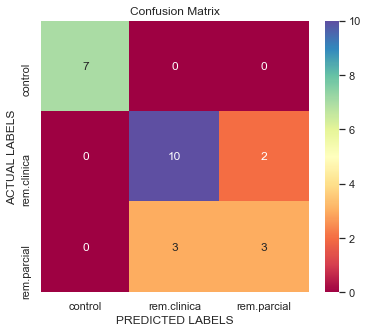

In [34]:
model(trainx,trainy,testx,testy, "LogReg") #https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

### Model Random Forest

Model predictiu: RF
accuracy 0.72
              precision    recall  f1-score   support

     control       1.00      0.86      0.92         7
 rem.clinica       0.67      0.83      0.74        12
 rem.parcial       0.50      0.33      0.40         6

    accuracy                           0.72        25
   macro avg       0.72      0.67      0.69        25
weighted avg       0.72      0.72      0.71        25



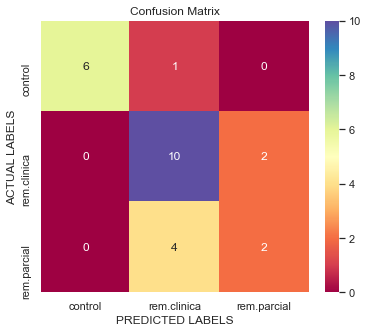

In [35]:
model(trainx,trainy,testx,testy, "RF")

### Model Support Vector Classifier

Model predictiu: SVC
accuracy 0.8
              precision    recall  f1-score   support

     control       1.00      1.00      1.00         7
 rem.clinica       0.77      0.83      0.80        12
 rem.parcial       0.60      0.50      0.55         6

    accuracy                           0.80        25
   macro avg       0.79      0.78      0.78        25
weighted avg       0.79      0.80      0.79        25



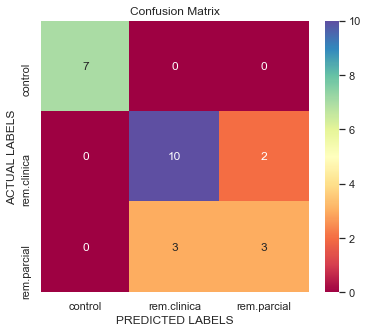

In [36]:
model(trainx,trainy, testx,testy, "SVC")

### Model XGBoost

Model predictiu: XGB
accuracy 0.72
              precision    recall  f1-score   support

     control       0.86      0.86      0.86         7
 rem.clinica       0.67      0.83      0.74        12
 rem.parcial       0.67      0.33      0.44         6

    accuracy                           0.72        25
   macro avg       0.73      0.67      0.68        25
weighted avg       0.72      0.72      0.70        25



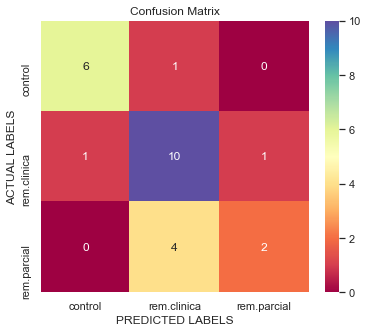

In [37]:
model(trainx,trainy, testx,testy, "XGB")
#model.feature_importances_

**S'observa que els resultats obtinguts no són gaire bons pel que fa a la predicció de pacients. Es decideix definir-ne dos (contemplant la regressió logística i el SVC**

### Modelització CONTROLS - PACIENTS 

Creem primer un model amb 2 categories ja que sembla ser que els control vs pacients (rem.clinica, rem.parcial) els classifica força bé (entre aquestes dues ja costa més).

In [38]:
dictic={"control":"control", "rem.clinica":"pacient", "rem.parcial":"pacient"}
trainy_gb=trainy.map(dictic)
testy_gb=testy.map(dictic)
print(np.unique(trainy_gb, return_counts=True))
np.unique(testy_gb, return_counts=True)

(array(['control', 'pacient'], dtype=object), array([25, 71], dtype=int64))


(array(['control', 'pacient'], dtype=object), array([ 7, 18], dtype=int64))

**Fem G-s per aquesta modelització i observem resultats a partir de la funció creada.**

In [39]:
def model_cp(trainx,trainy,testx,testy,mod):
    #trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.25, random_state=2, stratify=y)#donem pes a y(unbalanced)
    
    if mod=="SVC":
        clf=SVC(kernel="linear",C=0.05)#svm
    elif mod=="RF":
        clf=RandomForestClassifier(n_estimators=100,n_jobs=-1, max_depth=4, max_features=8)
    elif mod=="LogReg":
         clf=LogisticRegression(solver="newton-cg", C=0.1)
    elif mod=="XGB":
        clf=xgb.XGBClassifier( learning_rate= 0.01, max_depth= 5, 
                              n_estimators= 200, subsample= 0.3,
                             use_label_encoder=True,eval_metric="logloss")
 
    else:
        print("Command doesn't exist.")
    
    #entrenem
    clf.fit(trainx,trainy)
    #prediccions
    y_pred=clf.predict(testx)
    
    print("Model predictiu:",mod)
    
    #confusion matrix
    cm=confusion_matrix(testy,y_pred)
    print(cm)
    
    #accuracy
    print("accuracy",clf.score(testx,testy))
    print("f1-score", f1_score(testy, y_pred, average="weighted"))

    print(classification_report(testy, y_pred, target_names=['control', 'pacient']))

#### Model Support Vector Classifier

In [40]:
model_cp(trainx,trainy_gb, testx,testy_gb, "SVC")

Model predictiu: SVC
[[ 6  1]
 [ 0 18]]
accuracy 0.96
f1-score 0.959002079002079
              precision    recall  f1-score   support

     control       1.00      0.86      0.92         7
     pacient       0.95      1.00      0.97        18

    accuracy                           0.96        25
   macro avg       0.97      0.93      0.95        25
weighted avg       0.96      0.96      0.96        25



#### Model Regressió Logística

In [41]:
model_cp(trainx,trainy_gb, testx,testy_gb, "LogReg")

Model predictiu: LogReg
[[ 3  4]
 [ 0 18]]
accuracy 0.84
f1-score 0.816
              precision    recall  f1-score   support

     control       1.00      0.43      0.60         7
     pacient       0.82      1.00      0.90        18

    accuracy                           0.84        25
   macro avg       0.91      0.71      0.75        25
weighted avg       0.87      0.84      0.82        25



### Modelització PACIENTS:  rem.parcial i clínica

Provem de modelar nomes els pacients per intentar entrenar el model i obtenir una millor classificació.

In [42]:
trainx_nb=trainx[trainy.isin(["rem.clinica","rem.parcial"])]
trainy_nb=trainy[trainy.isin(["rem.clinica","rem.parcial"])]
testx_nb=testx[testy.isin(["rem.clinica","rem.parcial"])]
testy_nb=testy[testy.isin(["rem.clinica","rem.parcial"])]

print(np.unique(trainy_nb, return_counts=True))
np.unique(testy_nb, return_counts=True)

(array(['rem.clinica', 'rem.parcial'], dtype=object), array([45, 26], dtype=int64))


(array(['rem.clinica', 'rem.parcial'], dtype=object),
 array([12,  6], dtype=int64))

**Un cop s'ha fet G-s per aquestes dades, creem la funció a partir de la qual mirem quin model és el que s'ajusta millor.**

#### Model Regressió Logística

In [43]:
model_cp(trainx_nb,trainy_nb, testx_nb,testy_nb, "LogReg")

Model predictiu: LogReg
[[10  2]
 [ 3  3]]
accuracy 0.7222222222222222
f1-score 0.7151515151515153
              precision    recall  f1-score   support

     control       0.77      0.83      0.80        12
     pacient       0.60      0.50      0.55         6

    accuracy                           0.72        18
   macro avg       0.68      0.67      0.67        18
weighted avg       0.71      0.72      0.72        18



#### Model Support Vector Classifier

In [44]:
model_cp(trainx_nb,trainy_nb, testx_nb,testy_nb, "SVC")

Model predictiu: SVC
[[10  2]
 [ 3  3]]
accuracy 0.7222222222222222
f1-score 0.7151515151515153
              precision    recall  f1-score   support

     control       0.77      0.83      0.80        12
     pacient       0.60      0.50      0.55         6

    accuracy                           0.72        18
   macro avg       0.68      0.67      0.67        18
weighted avg       0.71      0.72      0.72        18



### Afegim dades clíniques al model de pacients
Es vol observar si el model s'ajusta millor per pacients ja que les dades clíniques per aquests seran importants.

S'imputen els valors faltants d'aquestes variables pel valor més frqüent (s'entrena el procés amb el conjunt training).

In [45]:
from sklearn.impute import SimpleImputer
imp_s = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

random.seed(44)
trainx_cl=pd.DataFrame(imp_s.fit_transform(train_cl))
testx_cl=pd.DataFrame(imp_s.transform(test_cl))

**S'analitza la correlació que existeix entre la variable d'interès i les variables clíniques.**

In [46]:
trainx_cl.columns=train_cl.columns
testx_cl.columns=test_cl.columns
trainx_cl.index=trainx.index.values
testx_cl.index=testx.index.values

trainxs_cl=pd.concat([trainx, trainx_cl], axis=1, join='inner')
testxs_cl=pd.concat([testx, testx_cl], axis=1, join='inner')

trainx_cll=trainxs_cl[trainy.isin(["rem.clinica","rem.parcial"])]
testx_cll=testxs_cl[testy.isin(["rem.clinica","rem.parcial"])]

corr_cl=pd.DataFrame(np.corrcoef([trainy_nb.map(dictib),trainx_cll["weeks_sick_leave"],trainx_cll["current_sick_leave"],trainx_cll["age_illness_onset"],trainx_cll["depre_episodes"],trainx_cll["number_hospitalitzations"],trainx_cll["clinical_stability"],trainx_cll["history_psychotic_symp"],trainx_cll["seasonal_pattern"],trainx_cll["history_suicidal_ideation"],trainx_cll["num_attempts"],trainx_cll["severity_attempt"],trainx_cll["family_hist_psychiatric"],trainx_cll["family_hist_suicide"]])) #si hi ha NAs no ens el fara: o imputem o prescindim dels NAs
corr_cl.columns=["hdrs_cod", "weeks_sick_leave","current_sick_leave","age_illness_onset","depre_episodes","number_hospitalitzations","clinical_stability","history_psychotic_symp","seasonal_pattern","history_suicidal_ideation","num_attempts","severity_attempt","family_hist_psychiatric","family_hist_suicide"]
corr_cl.index=["hdrs_cod", "weeks_sick_leave","current_sick_leave","age_illness_onset","depre_episodes","number_hospitalitzations","clinical_stability","history_psychotic_symp","seasonal_pattern","history_suicidal_ideation","num_attempts","severity_attempt","family_hist_psychiatric","family_hist_suicide"]
corr_cl.style.background_gradient()

,hdrs_cod,weeks_sick_leave,current_sick_leave,age_illness_onset,depre_episodes,number_hospitalitzations,clinical_stability,history_psychotic_symp,seasonal_pattern,history_suicidal_ideation,num_attempts,severity_attempt,family_hist_psychiatric,family_hist_suicide
hdrs_cod,1.000000,0.206777,0.238954,-0.074137,0.238830,-0.054963,-0.173452,-0.131000,-0.169285,-0.215286,0.049357,0.088308,0.054885,0.072766
weeks_sick_leave,0.206777,1.000000,0.341624,-0.030613,-0.045288,0.099814,0.240463,-0.145221,0.170759,-0.173646,0.146403,0.217744,0.071287,0.230199
current_sick_leave,0.238954,0.341624,1.000000,-0.044374,0.087639,0.025496,0.243015,-0.400250,0.156573,0.013537,0.077485,0.022834,0.007290,0.352779
age_illness_onset,-0.074137,-0.030613,-0.044374,1.000000,-0.431579,-0.295390,-0.041755,-0.066839,0.287361,0.242610,-0.265497,-0.312614,-0.063396,-0.077243
depre_episodes,0.238830,-0.045288,0.087639,-0.431579,1.000000,0.353131,-0.228688,-0.161043,-0.446124,-0.424569,0.317704,0.210004,0.045033,0.127785
number_hospitalitzations,-0.054963,0.099814,0.025496,-0.295390,0.353131,1.000000,-0.121356,0.008532,-0.280841,-0.234432,0.605699,0.463248,-0.030890,0.117753
clinical_stability,-0.173452,0.240463,0.243015,-0.041755,-0.228688,-0.121356,1.000000,0.075830,0.112188,0.288635,-0.155518,-0.157189,0.024090,0.097625
history_psychotic_symp,-0.131000,-0.145221,-0.400250,-0.066839,-0.161043,0.008532,0.075830,1.000000,-0.099441,0.174534,-0.072048,-0.035952,-0.187259,-0.281070
seasonal_pattern,-0.169285,0.170759,0.156573,0.287361,-0.446124,-0.280841,0.112188,-0.099441,1.000000,0.097045,-0.093104,-0.211208,0.065560,0.058479
history_suicidal_ideation,-0.215286,-0.173646,0.013537,0.242610,-0.424569,-0.234432,0.288635,0.174534,0.097045,1.000000,-0.347380,-0.451795,-0.026528,-0.140335


La tutora considera important tenir en compte alguna de les variables clíniques com *nombre d'episodis previs*, *clinical_stability*...

In [47]:
trainxs_cls=pd.concat([trainx, trainx_cl["clinical_stability"], trainx_cl["seasonal_pattern"], trainx_cl["depre_episodes"], trainx_cl["current_sick_leave"]], axis=1, join='inner')
testxs_cls=pd.concat([testx, testx_cl["clinical_stability"], testx_cl["seasonal_pattern"], testx_cl["depre_episodes"], testx_cl["current_sick_leave"]], axis=1, join='inner')
#trainxs_cls=pd.concat([trainx, trainx_cl["history_suicidal_ideation"], trainx_cl["seasonal_pattern"]], axis=1, join='inner')
#testxs_cls=pd.concat([testx, testx_cl["history_suicidal_ideation"], testx_cl["seasonal_pattern"]], axis=1, join='inner')


#LES PASSEM A DUMMIES
spat={1:1, 2:0} #yes - no

trainxs_cls.seasonal_pattern = trainxs_cls["seasonal_pattern"].map(spat)#.astype("category")
testxs_cls.seasonal_pattern = testxs_cls["seasonal_pattern"].map(spat)#.astype("category")

trainxs_cls.history_psychotic_symp = trainxs_cls["current_sick_leave"].map(spat)#.astype("category")
testxs_cls.history_psychotic_symp = testxs_cls["current_sick_leave"].map(spat)#.astype("category")

In [48]:
datacl=pd.concat([pd.concat([trainxs_cls, testxs_cls], axis=0, join='inner'),pd.concat([trainy_nb, testy_nb], axis=0, join='inner')], axis=1, join="inner")
datacl.to_csv('datacl.csv', header=True, index=False)

In [49]:
model_cp(trainxs_cls[trainy.isin(["rem.clinica","rem.parcial"])], trainy_nb, testxs_cls[testy.isin(["rem.clinica","rem.parcial"])], testy_nb, "LogReg")

Model predictiu: LogReg
[[10  2]
 [ 2  4]]
accuracy 0.7777777777777778
f1-score 0.7777777777777778
              precision    recall  f1-score   support

     control       0.83      0.83      0.83        12
     pacient       0.67      0.67      0.67         6

    accuracy                           0.78        18
   macro avg       0.75      0.75      0.75        18
weighted avg       0.78      0.78      0.78        18



In [50]:
model_cp(trainxs_cls[trainy.isin(["rem.clinica","rem.parcial"])], trainy_nb, testxs_cls[testy.isin(["rem.clinica","rem.parcial"])], testy_nb, "SVC")

Model predictiu: SVC
[[11  1]
 [ 3  3]]
accuracy 0.7777777777777778
f1-score 0.764102564102564
              precision    recall  f1-score   support

     control       0.79      0.92      0.85        12
     pacient       0.75      0.50      0.60         6

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18



### Definim els dos models definitius per a predir nous casos

Definim la funció que ens guardarà automàticament el model entrenat per poder carregar-lo posteriorment. Entrenem els models amb totes les dades, ja que ja hem fet la validation.
- Model inicial (classifiquem entre controls i pacients: **SVC** (Support Vector Classification)
- Model secundari per a poder classificar entre pacients en remissió i no recuperats (si s'escau): Regressió logística

In [51]:
def model_def(trainx,trainy,testx,testy,mod):
    
    if mod=="SVC":
        clf=SVC(kernel="linear",C=0.05)#svm
    elif mod=="LogReg":
         clf=LogisticRegression(solver="newton-cg", C=0.1)
 
    else:
        print("Command doesn't exist.")
    
    #entrenem
    clf.fit(trainx,trainy)
    return(clf)

In [52]:
import pickle

In [53]:
def model_def_s(mod, numero):
    model_s="model"+str(numero)+".sav"
    pickle.dump(mod,open(model_s, "wb"))

### Model per classificació control- pacient

In [54]:
dictic={"control":"control", "rem.clinica":"pacient", "rem.parcial":"pacient"}
trainy_gb=trainy.map(dictic)
testy_gb=testy.map(dictic)


model_def_s(model_def(trainx, trainy_gb, testx, testy_gb, "SVC"),1)

### Model per classificació  pacient rem.clínica- rem.parcial 

In [55]:
trainx_nb=trainx[trainy.isin(["rem.clinica","rem.parcial"])]
trainy_nb=trainy[trainy.isin(["rem.clinica","rem.parcial"])]
testx_nb=testx[testy.isin(["rem.clinica","rem.parcial"])]
testy_nb=testy[testy.isin(["rem.clinica","rem.parcial"])]

model_def_s(model_def(trainx_nb, trainy_nb, testx_nb, testy_nb, "LogReg"), 2)

In [56]:
trainxs_cls=pd.concat([trainx, trainx_cl["clinical_stability"], trainx_cl["seasonal_pattern"], trainx_cl["depre_episodes"], trainx_cl["current_sick_leave"]], axis=1, join='inner')
testxs_cls=pd.concat([testx, testx_cl["clinical_stability"], testx_cl["seasonal_pattern"], testx_cl["depre_episodes"], testx_cl["current_sick_leave"]], axis=1, join='inner')
#trainxs_cls=pd.concat([trainx, trainx_cl["history_suicidal_ideation"], trainx_cl["seasonal_pattern"]], axis=1, join='inner')
#testxs_cls=pd.concat([testx, testx_cl["history_suicidal_ideation"], testx_cl["seasonal_pattern"]], axis=1, join='inner')


#LES PASSEM A DUMMIES
spat={1:1, 2:0} #yes - no

trainxs_cls.seasonal_pattern = trainxs_cls["seasonal_pattern"].map(spat)#.astype("category")
testxs_cls.seasonal_pattern = testxs_cls["seasonal_pattern"].map(spat)#.astype("category")

trainxs_cls.history_psychotic_symp = trainxs_cls["current_sick_leave"].map(spat)#.astype("category")
testxs_cls.history_psychotic_symp = testxs_cls["current_sick_leave"].map(spat)#.astype("category")

<AxesSubplot:>

<Figure size 720x1440 with 0 Axes>

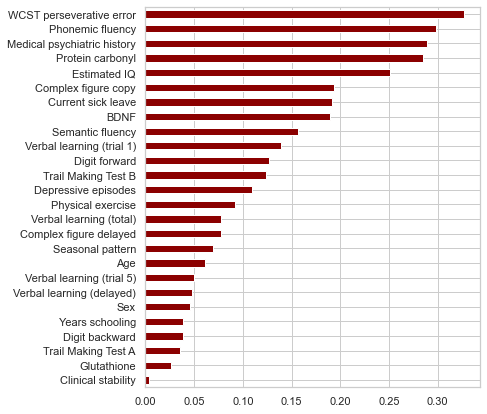

In [57]:
###Representacio grafica rellevancia variables predictores model pacients
sns.set_theme(style="whitegrid" , rc={"figure.figsize":(6, 7)})
importance = model_def(trainxs_cls[trainy.isin(["rem.clinica","rem.parcial"])], trainy_nb, testxs_cls[testy.isin(["rem.clinica","rem.parcial"])], testy_nb, "LogReg").coef_[0]

importa=pd.DataFrame(importance)
importa.index=["Estimated IQ","Verbal learning (trial 1)","Verbal learning (trial 5)","Verbal learning (total)","Verbal learning (delayed)", "Digit forward","Digit backward", "Trail Making Test A", 
                       "Trail Making Test B", "Complex figure copy", "Complex figure delayed","Phonemic fluency","Semantic fluency","WCST perseverative error",
               "Age", "Sex", "Years schooling", "Physical exercise", "Medical psychiatric history", "BDNF", "Protein carbonyl", "Glutathione", "Clinical stability", "Seasonal pattern", "Depressive episodes", "Current sick leave"]
      

plt.figure(figsize=(10,20))    
abs(importa).sort_values(by=[0]).plot(kind="barh",color="darkred", legend=False)

In [58]:
###GUARDEM
model_def_s(model_def(trainxs_cls[trainy.isin(["rem.clinica","rem.parcial"])], trainy_nb, testxs_cls[testy.isin(["rem.clinica","rem.parcial"])], testy_nb, "LogReg"), 3)

#### Carreguem els models guardats per usar-los en el TKInter

In [59]:
model1=pickle.load(open("model1.sav","rb")) #control- pacients

model2=pickle.load(open("model2.sav","rb")) #pacients

model3=pickle.load(open("model3.sav","rb")) #clinic pacients

### Precisió prediccions segons el nombre d'espais en blanc que es deixen (n mitjà de valors faltants)
- Agafem el conjunt test i calculem l'accuracy per la mitjana del nombre de missings: agafem el conjunt test i per cada cas, substituim n valors (n variables) aleatòriament. Es repeteix 100 vegades el procés per obtenir una mitjana.
D'aquesta manera calculem "mitjanament" l'accuracy per una mitjana de n missings en un cas predit. Els valors missings els imputarem amb el pipeline.

Accuracy mitja pel valors faltants del model de support vector classifier (controls-pacients)

In [60]:
import random
random.seed(44)

# Controls-pacients
pos_var=range(0,len(testx.columns))
nNA=range(0,20)#len(testx.columns))
rows=range(0,len(testx.index))
acc1=list()

mitj=range(0,100)
nn1=list()

for n in nNA:
    case=pd.DataFrame(testx.to_numpy(copy=True))
    for m in mitj:
        case=pd.DataFrame(testx.to_numpy(copy=True))
        for c in rows:
            posNA=random.sample(pos_var, n) #que retorni les variables (posicio) segons el nombre de missings
            case.iloc[c][posNA]=np.nan
        case.columns=["age", "sex", "years_schooling", "physical_exercise", "medical_psychiatric_history","T_vocab","CVLT_trial1","CVLT_trial5","CVLT_total","CVLT_delayed", "DIGIT_forward","DIGIT_backward", "TMTA_sec", 
                       "TMTB_sec", "ROCF_copy", "ROCF_delayed","FLUENCY_phonemic","FLUENCY_semantic","WCST_perseverative_error", "BDNF", "protein_carbonyl", "glutathione"]
        casex=pd.DataFrame(pipeline.transform(case)) #han d'estar passats pel pip
        acc1.append(model1.score(casex, testy_gb)) #save accuracy per fer plot
        nn1.append((n+1))

In [61]:
acc11=pd.DataFrame()
acctest1=[model1.score(testx, testy_gb)]*100
nas1=[0]*100
acc11["Nas"]=nas1+nn1
acc11["accuracy"]=acctest1+acc1

Accuracy mitjà pel valors faltants del model de regressió logística (pacients)

In [63]:
random.seed(44)

pos_var=range(0,len(testx_nb.columns))
nNA=range(0,20)
rows=range(0,len(testx_nb.index))
acc2=list()
mitj=range(0,100)
nn=list()

for n in nNA:
    case=pd.DataFrame(testx_nb.to_numpy(copy=True))
    for m in mitj:
        case=pd.DataFrame(testx_nb.to_numpy(copy=True))
        for c in rows:
            posNA=random.sample(pos_var, n) #que retorni les variables (posicio) segons el nombre de missings
            case.iloc[c][posNA]=np.nan
            case.columns=["age", "sex", "years_schooling", "physical_exercise", "medical_psychiatric_history","T_vocab","CVLT_trial1","CVLT_trial5","CVLT_total","CVLT_delayed", "DIGIT_forward","DIGIT_backward", "TMTA_sec", 
                       "TMTB_sec", "ROCF_copy", "ROCF_delayed","FLUENCY_phonemic","FLUENCY_semantic","WCST_perseverative_error", "BDNF", "protein_carbonyl", "glutathione"]
        casex=pd.DataFrame(pipeline.transform(case)) #han d'estar passats pel pip
        acc2.append(model2.score(casex, testy_nb)) #save accuracy per fer plot
        nn.append(n+1)

In [64]:
acc22=pd.DataFrame()
acctest2=[model3.score(testxs_cls[testy.isin(["rem.clinica","rem.parcial"])], testy_nb)] *100
nas2=[0]*100
acc22["Nas"]=nas2+nn
acc22["accuracy"]=acctest2+acc2[::-1]

[Text(0, 0.5, 'mitjana (Accuracy)'), Text(0.5, 0, 'Nombre valors faltants')]

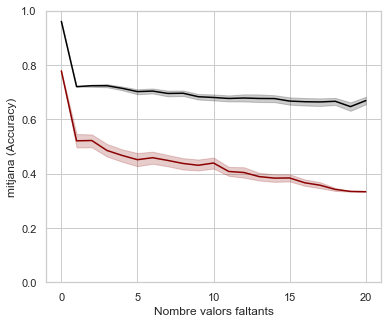

In [80]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.set_theme(style="whitegrid" )#,palette="pastel"

# Plot the responses for different events and regions
ax=sns.lineplot(x="Nas", y="accuracy", data=acc22, color="darkred")

sns.lineplot(x="Nas", y="accuracy", data=acc11, color="black")
            
ax.set(ylim=(0,1))
ax.set_xticks([0,5,10,15,20])
#ax.set_
ax.set(ylabel="mitjana (Accuracy)", xlabel="Nombre valors faltants")

**El fet d'afegir variables CLÍNIQUES al model comporta que al formulari s'hauran de tenir en compte:**

Pel que fa al model controls-pacients, controls tenen NA a aquestes variables: **Opció B**
- Opció A: considerar aquesta variable i contemplar-la com a 0 (crec que pot tenir massa influencia i no serà bo
- Opció B: a l'hora de modelar aquest 1r model, no tenir-la en compte al tk (agafar-la després)


**Al TK inter s'ha acabat no tenint en compte les variables clíniques quan es modelen pacients i controls ja que a més a més el model separa molt bé  amb les variables que tenim. I en cas que es consideri que és pacient, tenir-les en compte en el model.**

# TKInter

In [66]:
#https://docs.python.org/3/library/tkinter.html
from tkinter import *
from tkinter import messagebox
from tkinter import Tk, Label, Button
from tkinter import ttk #pel combobox
#https://documentation.help/Tcl-Tk/ttk_combobox.htm
#https://www.delftstack.com/es/tutorial/tkinter-tutorial/tkinter-combobox/
from tkinter.messagebox import showinfo
from PIL import Image, ImageTk

import pickle

import math

*https://www.bing.com/videos/search?q=pickle+python&docid=607999655031746315&mid=3C1298730ED5B458BF2E3C1298730ED5B458BF2E&view=detail&FORM=VIRE*


Deifinim la funcio per predir dins el validate:

In [67]:
def mod_pred1(newcase):
    return(model1.predict(newcase))

def mod_pred2(newcase):
    return(model2.predict(newcase))

def mod_pred3(newcase):
    return(model3.predict(newcase))

Per transformar les variables categoriques en numeriques per fer model (les combobox):

In [68]:
def transform_sex(x):
    if(x=="Male"):
        x=0
    else: x=1
    return(x)

def transform_med(x):
    if(x=="No"):
        x=0
    else: x=1
    return(x)

def transform_ex(x):
    if(x=="Never"):
        x=0
    else: 
        if(x=="Once a week"): 
            x=1 
        else: 
            if(x=="<=3 times a week"):
                x=2
            else: x=3
    return(x) 

Funció per fer la transformació logarítmica de la variable glutathione:

In [69]:
def transform_log(x):
    if type(x)==float or type(x)==int:
        y=np.log10(x)
        return y
    else:
        y=None
        return y

**Creem la funció per insertar a command: quan cliquem submit a tkinter**

El que fem aqui es:
  - crear una funcio que guardi els valors que s'han introduit de vada variable
  - els guarda en un df que tindra una sola fila (=nou pacient)
  - transformem els valors en el tipus de dada que toqui (num/string)
  - passem la funcio del model que prediura el nou cas
  - ens retorna el valor predit
  - es valida el valor que s'entra i es permeten NAs 
  https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/entry-validation.html#:~:text=Tkinter%20can%20also%20provide%20a%20number%20of%20items,each%20additional%20s%20i%20is%20a%20substitution%20code

In [70]:
def nas(x):
    if x=="":
        y=None
    else:
        y=x
        return(y)

In [71]:
####radiobutton/checkbutton
#https://www.youtube.com/watch?v=uqJZWLlnSqs

def validate():
    
    print("Predicting value, please wait...")
    #messagebox.showinfo("Manual", "Values for each factor must be entered next to its label. \n Press submit to see the prediction when you have completed the information \n Please press accept to enter the values.")
     
    newPatient=pd.DataFrame(columns=["age","sex","years_schooling","physical_exercise","medical_psychiatric_history",
                                     "T_vocab","CVLT_trial1","CVLT_trial5","CVLT_total","CVLT_delayed", 
                                     "DIGIT_forward","DIGIT_backward", "TMTA_sec", "TMTB_sec", "ROCF_copy", "ROCF_delayed",
                                     "FLUENCY_phonemic","FLUENCY_semantic","WCST_perseverative_error","BDNF",
                                     "protein_carbonyl","glutathione","clinical_stability" ,"seasonal_pattern", "depre_episodes", "current_sick_leave"], index=range(1))#"TOTAL_FAST"
    
    newPatient["age"]=nas(age_value.get())
    newPatient["sex"]=transform_sex(sex_value.get())
    newPatient["years_schooling"]=nas(y_sch_value.get())
    newPatient["physical_exercise"]=transform_ex(ph_ex_value.get())
    newPatient["medical_psychiatric_history"]=transform_med(med_psy_value.get())
    #newPatient["TOTAL_FAST"]=int(fast_value.get())    
    newPatient["T_vocab"]=nas(voc_value.get())
    newPatient["CVLT_trial1"]=nas(Ct1_value.get())
    newPatient["CVLT_trial5"]=nas(Ct5_value.get())
    newPatient["CVLT_total"]=nas(Ct_value.get())
    newPatient["CVLT_delayed"]=nas(Cd_value.get())
    newPatient["DIGIT_forward"]=nas(df_value.get())
    newPatient["DIGIT_backward"]=nas(db_value.get())
    newPatient["TMTA_sec"]=nas(tmta_value.get())
    newPatient["TMTB_sec"]=nas(tmtb_value.get())
    newPatient["ROCF_copy"]=nas(Rc_value.get())
    newPatient["ROCF_delayed"]=nas(Rd_value.get())
    newPatient["FLUENCY_phonemic"]=nas(Fp_value.get())
    newPatient["FLUENCY_semantic"]=nas(Fs_value.get())
    newPatient["WCST_perseverative_error"]=nas(W_value.get())
    newPatient["BDNF"]=nas(bdnf_value.get())
    newPatient["protein_carbonyl"]=nas(pcc_value.get())
    newPatient["glutathione"]=nas(gl_value.get())
    newPatient["clinical_stability"]=nas(clstab_value.get())
    newPatient["seasonal_pattern"]=transform_med(sp_value.get())
    newPatient["depre_episodes"]=nas(depre_value.get())
    newPatient["current_sick_leave"]=transform_med(csi_value.get())
    
    newPatient["glutathione"]=transform_log(newPatient["glutathione"])
    
    hcnewPatient=newPatient.drop(columns=["clinical_stability","seasonal_pattern","depre_episodes", "current_sick_leave"])
    hcNewPatient=pipeline.transform(hcnewPatient)
    proNewPatient=np.append(hcNewPatient, [newPatient["clinical_stability"],newPatient["seasonal_pattern"],newPatient["depre_episodes"],newPatient["current_sick_leave"]]).reshape(1,-1)
           
    print("Prediccio", mod_pred1(hcNewPatient)[0]) #funcio amb el model
    
    if (mod_pred1(hcNewPatient)[0]=="pacient"):#[0] ens dona la prediccio
        print("Prediccio", mod_pred3(proNewPatient)[0])
        
        if(mod_pred3(proNewPatient)[0]=="rem.parcial"):
             messagebox.showinfo("Prediction", "Patient in parcial remission")
        else:  
            messagebox.showinfo("Prediction", "Patient in clinical remission")
    else:
        messagebox.showinfo("Prediction", "Patient with no residual sympthoms")
            
    return ""

https://www.youtube.com/watch?v=oRYshQCOHOs 
per poder fer un validate de les variables i permetre que estiguin en blanc

In [77]:
#https://www.youtube.com/watch?v=6NxhdS60494
#https://www.geeksforgeeks.org/python-simple-registration-form-using-tkinter/?ref=rp
#https://www.youtube.com/watch?v=95JrLWKy6-I

#creem la finestra arrel (root)
root=Tk()#gui window
# set the background colour of GUI window
root.configure(background="light gray")
  
# set the title of GUI window
root.title("Psychiatric form")
  
# set the configuration of GUI window
root.geometry("500x300")

#inicialitzem checkbuttons
sex_value=StringVar()
med_psy_value=StringVar()
ph_ex_value=StringVar()
sp_value=StringVar()
csi_value=StringVar()


#validation of the input values (allow missings)
def validation_p(x):
    if x.isdigit():
        return(True)
    elif x=="":
        return True
    else:
        return(False)
    
def incorrect(x):
    x=None
    return(x)

def on_float_entry_validate(x): #afegir decimals
        if not x:
            return True
        if "." in x and len(x.split(".")[-1]) > 2:
            return False
        try:
            float(x)
        except ValueError:
            return False
        return True

# create a Form label
#heading = Label(root, text="FORM", fg="white",bg="green")
#heading.place(x=100, y=0)  

sex = Label(root, text="Sex", bg="light gray")
sex.place(x=10, y=20)
#sex_male=Radiobutton(root, text="Male", value=0, variable=sex_value).grid(row=2, column=2)
#sex_fem=Radiobutton(root, text="Female", value=1, variable=sex_value).grid(row=2, column=3)
#sex_value = Entry(root, width=30)
#sex_value.grid(row=2, column=2)
sex_combo=ttk.Combobox(root, textvariable=sex_value,values=["Male","Female"])
sex_combo.place(x=170, y=20)
#sex_combo["values"]=(0,1) 

# create Age label
age = Label(root, text="Age", bg="light gray")
age.place(x=10, y=40) #fins aqui ens apareix el nom de les labels
    # create a text entry box
    # for typing the information
age_value = Entry(root, width=30)
#register=register the function we callback
#validate=key: validation occurs whenever any input from keyboard
#‘%P’: passed to denote the value that the text will have if the change is allowed.
#invalidcommand option that calls a function whenever the validatecommand returns False.
age_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
age_value.place(x=170, y=40)
  
y_sch = Label(root, text="Years schooling", bg="light gray")
y_sch.place(x=10, y=60)
y_sch_value = Entry(root, width=30)
y_sch_value.place(x=170, y=60)
y_sch_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))

ph_ex = Label(root, text="Physical Exercise", bg="light gray")
ph_ex.place(x=10, y=80)
ex_combo=ttk.Combobox(root, textvariable=ph_ex_value,
                      values=["Never","Once a week","<=3 times a week", ">3 times a week"])
ex_combo.place(x=170, y=80)
#0= never
#ph_never=Radiobutton(root, text="Never", value=0, variable=ph_ex_value).grid(row=4, column=2)
#1=once a week
#ph_1=Radiobutton(root, text="Once a week", value=1, variable=ph_ex_value).grid(row=4, column=3)
#2= ≤ 3 times a week
#ph_3=Radiobutton(root, text="less 3 a week", value=2, variable=ph_ex_value).grid(row=4, column=4)
#3= more than 3 times
#ph_m3=Radiobutton(root, text="more 3 a week", value=3, variable=ph_ex_value).grid(row=4, column=5)
#ph_ex_value = Entry(root, width=30)
#ph_ex_value.grid(row=4, column=2)
    
ct = Label(root, text="Cognitive tests", bg="light gray", fg="dark red", font=("arial bold", 10))
ct.place(x=10, y=110) 
#ct1= Label(root, text="Puntuation ranges are specified next to each test.",bg="light green",fg="black", font=("arial italic", 8))
#ct1.bind(font_config, text, "Helvetica 9 italic")
           #\n A maximum of 5 tests can be left in blank. ")
ct1= Label(root, text="Puntuation range",bg="light gray",fg="dark red", font=("arial italic", 8))
ct1.place(x=370, y=110) 

    # create a Semester label
#fast = Label(root, text="TOTAL FAST", bg="light green")
#fast.grid(row=6, column=0)
#fast_value = Entry(root, width=30)
#fast_value.grid(row=6, column=2)
   
voc = Label(root, text="Estimated IQ (T)", bg="light gray")
voc.place(x=10, y=130)
voc_value = Entry(root, width=30)
voc_value.place(x=170, y=130)
voc_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
vocr=Label(root, text="20 - 30", bg="light gray")
vocr.place(x=390, y=130)

Ct1 = Label(root, text="Verbal learning trial 1", bg="light gray")
Ct1.place(x=10, y=150)
Ct1_value = Entry(root, width=30)
Ct1_value.place(x=170, y=150)
Ct1_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
cr=Label(root, text="0 - 15", bg="light gray")
cr.place(x=390, y=150)

Ct5 = Label(root, text="Verbal learning trial 5", bg="light gray")
Ct5.place(x=10, y=170)
Ct5_value = Entry(root, width=30)
Ct5_value.place(x=170, y=170)
Ct5_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
cr5=Label(root, text="0 - 15", bg="light gray")
cr5.place(x=390, y=170)

Ct = Label(root, text="Verbal learning total", bg="light gray")
Ct.place(x=10, y=190)
Ct_value = Entry(root, width=30)
Ct_value.place(x=170, y=190)
Ct_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
ctr=Label(root, text="0 - 75", bg="light gray")
ctr.place(x=390, y=190)

Cd= Label(root, text="Verbal learning delayed", bg="light gray")
Cd.place(x=10, y=210)
Cd_value = Entry(root, width=30)
Cd_value.place(x=170, y=210)
Cd_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
cdr=Label(root, text="0 - 15", bg="light gray")
cdr.place(x=390, y=210)    
    
df = Label(root, text="Digit forward", bg="light gray")
df.place(x=10, y=230)
df_value = Entry(root, width=30)
df_value.place(x=170, y=230)
df_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
dr=Label(root, text="0 - 20", bg="light gray")
dr.place(x=390, y=230)    

db = Label(root, text="Digit backward", bg="light gray")
db.place(x=10, y=250)
db_value = Entry(root, width=30)
db_value.place(x=170, y=250)
db_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
dbr=Label(root, text="0 - 16", bg="light gray")
dbr.place(x=390, y=250) 

tmta = Label(root, text="Trail Making Test A", bg="light gray")
tmta.place(x=10, y=270)
tmta_value = Entry(root, width=30)
tmta_value.place(x=170, y=270)
tmta_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
tr=Label(root, text="0 - 300", bg="light gray")
tr.place(x=390, y=270)

tmtb = Label(root, text="Trail Making Test B", bg="light gray")
tmtb.place(x=10, y=290)
tmtb_value = Entry(root, width=30)
tmtb_value.place(x=170, y=290)
tmtb_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
tbr=Label(root, text="0 - 300", bg="light gray")
tbr.place(x=390, y=290)

Rc = Label(root, text="Complex figure copy", bg="light gray")
Rc.place(x=10, y=310)
Rc_value = Entry(root, width=30)
Rc_value.place(x=170, y=310)
Rc_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
rcr=Label(root, text="0 - 34", bg="light gray")
rcr.place(x=390, y=310)

Rd = Label(root, text="Complex figure delayed", bg="light gray")
Rd.place(x=10, y=330)
Rd_value = Entry(root, width=30)
Rd_value.place(x=170, y=330)
Rd_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
rdr=Label(root, text="0 - 34", bg="light gray")
rdr.place(x=390, y=330)

Fs = Label(root, text="Semantic fluency", bg="light gray")
Fs.place(x=10, y=350)
Fs_value = Entry(root, width=30)
Fs_value.place(x=170, y=350)
Fs_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
fsr=Label(root, text="0 - 60", bg="light gray")
fsr.place(x=390, y=350)

Fp = Label(root, text="Phonemic fluency", bg="light gray")
Fp.place(x=10, y=370)
Fp_value = Entry(root, width=30)
Fp_value.place(x=170, y=370)
Fp_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
fpr=Label(root, text="0 - 60", bg="light gray")
fpr.place(x=390, y=370)

W = Label(root, text="WCST perseverative error", bg="light gray")
W.place(x=10, y=390)
W_value = Entry(root, width=30)
W_value.place(x=170, y=390)
W_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))
wr=Label(root, text="0 - 100", bg="light gray")
wr.place(x=390, y=390)    
    
bf = Label(root, text="Biochemical factors", bg="light gray", fg="dark red", font=("arial bold", 10))
bf.place(x=10, y=420)
#bf1 = Label(root, text="Collected with KitElisa.",fg="black", bg="light green", font=("arial italic",8))
#bf1.place(x=170, y=420)
bf2 = Label(root, text="Serum levels range",fg="dark red", bg="light gray", font=("arial italic",8))
bf2.place(x=370, y=420)

bdnf = Label(root, text="BDNF", bg="light gray")
bdnf.place(x=10, y=440)
bdnf_value = Entry(root, width=30)
bdnf_value.place(x=170, y=440)
bdnf_value.config(validate="all", validatecommand=(root.register(on_float_entry_validate),"%P"), invalidcommand=(root.register(incorrect),"%W"))
bdr=Label(root, text="- 0.2 - 8.7", bg="light gray")
bdr.place(x=380, y=440)  
    
pcc = Label(root, text="Proteyn carbonil", bg="light gray")
pcc.place(x=10, y=460)
pcc_value = Entry(root, width=30)
pcc_value.place(x=170, y=460)
pcc_value.config(validate="all", validatecommand=(root.register(on_float_entry_validate),"%P"), invalidcommand=(root.register(incorrect),"%W"))
pcr=Label(root, text="0.1 - 3.4", bg="light gray")
pcr.place(x=387, y=460)   
    
gl = Label(root, text="Glutathione", bg="light gray")
gl.place(x=10, y=480)
gl_value = Entry(root, width=30)
gl_value.place(x=170, y=480)
gl_value.config(validate="all", validatecommand=(root.register(on_float_entry_validate),"%P"), invalidcommand=(root.register(incorrect),"%W"))
br=Label(root, text="0 - 12.5", bg="light gray")
br.place(x=390, y=480) 

cl = Label(root, text="Clinical information", bg="light gray", fg="dark red", font=("arial bold", 10))
cl.place(x=10, y=510)
cl1 = Label(root, text="",fg="white", bg="light gray")
cl1.place(x=170, y=510)


#med_psy_no=Radiobutton(root, text="No", value=0, variable=med_psy_value).grid(row=5, column=2)
#med_psy_yes=Radiobutton(root, text="Yes", value=1, variable=med_psy_value).grid(row=5, column=3)
#med_psy_value = Entry(root, width=30)
#med_psy_value.grid(row=5, column=2)

cst = Label(root, text="Weeks in clinical stability", bg="light gray")
cst.place(x=10, y=530)
clstab_value = Entry(root, width=30)
clstab_value.place(x=170, y=530)
clstab_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))

depr = Label(root, text="Depressive episodes", bg="light gray")
depr.place(x=10, y=550)
depre_value = Entry(root, width=30)
depre_value.place(x=170, y=550)
depre_value.config(validate="all", validatecommand=(root.register(validation_p),"%P"), invalidcommand=(root.register(incorrect),"%W"))

csi = Label(root, text="Current sick leave", bg="light gray")
csi.place(x=10, y=570)
csi_combo = ttk.Combobox(root, textvariable=csi_value,values=["No","Yes"])
csi_combo.place(x=170, y=570)

med_psy = Label(root, text="Medical Psychiatric History", bg="light gray")
med_psy.place(x=10, y=590)
med_combo=ttk.Combobox(root, textvariable=med_psy_value,values=["No","Yes"])
med_combo.place(x=170, y=590)

sp = Label(root, text="Seasonal pattern", bg="light gray")
sp.place(x=10, y=610)
sp_combo = ttk.Combobox(root, textvariable=sp_value,values=["No","Yes"])
sp_combo.place(x=170, y=610)



#Radiobutton(root, text="Male", value=0)
#Radiobutton(root, text="Female", value=1)
   
    # grid method is used for placing the widgets at respective positions
    # in table like structure .
#def submit():
   # print("Predicting value, please wait...")
    # create a Submit Button and place into the root window
messagebox.showinfo("Manual", "Values for each factor must be entered next to its label. \n If no information is given about any variable, leave the field in blank: more than 2 missing values will decrease the accuracy aproximately 20%. \n  \n Press the \"submit\" button to see the prediction once the information is filled. \n \n For further explanation, a brieve tutorial about its functioning can be seen in the following link: https://youtu.be/bKM0n_Nun8w")
    
submit = Button(root, text="Submit", fg="white", bg="dark red", command=validate)
submit.place(x=200, y=650)

#root.iconbitmap(r"C:\Users\csc\Documents\GEA\4t-GEA\TFG\python_TFG\Logo_peuc.jpg")
#uab=PhotoImage(file=r"C:\Users\csc\Documents\GEA\4t-GEA\TFG\python_TFG\OIP.png")
#Label(root,image=uab,bg='grey').pack
  
    # start the GUI
root.mainloop()


Predicting value, please wait...
Prediccio pacient
Prediccio rem.parcial


### Representació gràfica distribució tests cognitius

In [73]:
memory=pd.read_csv("memory.csv")
memo=pd.read_csv("memo.csv")
speed=pd.read_csv("speed.csv")
attention=pd.read_csv("attention.csv")
executive=pd.read_csv("executive.csv")
lleng=pd.read_csv("lleng.csv")

In [86]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="bright")

Text(0.15, 1.05, 'A   MEMÒRIA VERBAL')

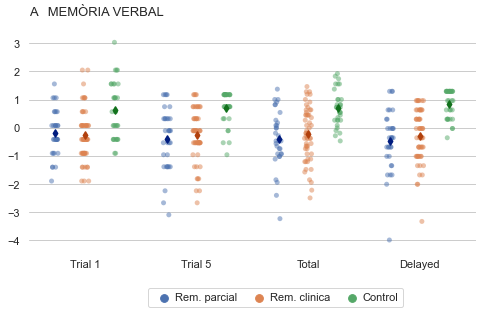

In [80]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="test", y="tests", hue="cat",
              data=memory, dodge=True, alpha=.5, zorder=1)#, palette="pastel")

# Show the conditional means
sns.pointplot(x="test", y="tests", hue="cat",
              data=memory, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)
# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles[:3],labels[3:],
          handletextpad=0, columnspacing=1,
           bbox_to_anchor=(0.85, -0.15), ncol=3, frameon=True)
ax.set(ylabel="", xlabel="")
ax.set_title('A   MEMÒRIA VERBAL', fontsize = 13, y =1.05, x=0.15)

Text(0.15, 1.05, 'B   MEMÒRIA VISUAL')

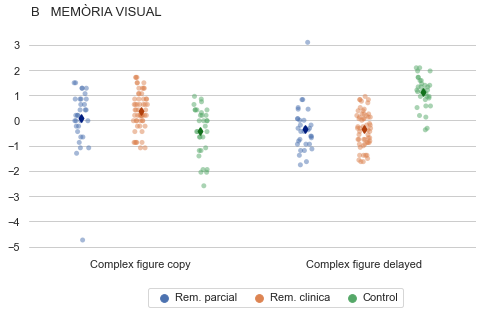

In [81]:
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="test", y="tests", hue="cat",
              data=memo, dodge=True, alpha=.5, zorder=1)#, palette="pastel")

# Show the conditional means
sns.pointplot(x="test", y="tests", hue="cat",
              data=memo, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles[:3],labels[3:],
          handletextpad=0, columnspacing=1,
           bbox_to_anchor=(0.85, -0.15), ncol=3, frameon=True)
ax.set(ylabel="", xlabel="")
ax.set_title('B   MEMÒRIA VISUAL', fontsize = 13, y =1.05, x=0.15)

Text(0.15, 1.05, 'C   ATENCIÓ')

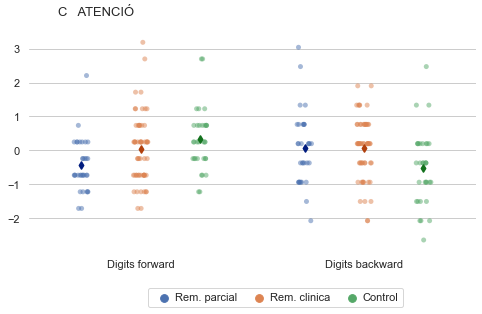

In [82]:
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="test", y="tests", hue="cat",
              data=attention, dodge=True, alpha=.5, zorder=1)#, palette="pastel")

# Show the conditional means
sns.pointplot(x="test", y="tests", hue="cat",
              data=attention, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles[:3],labels[3:],
          handletextpad=0, columnspacing=1,
           bbox_to_anchor=(0.85, -0.15), ncol=3, frameon=True)
ax.set(ylabel="", xlabel="")
ax.set_title('C   ATENCIÓ', fontsize = 13, y =1.05, x=0.15)

Text(0.15, 1.05, 'D   FUNCIONS EXECUTIVES')

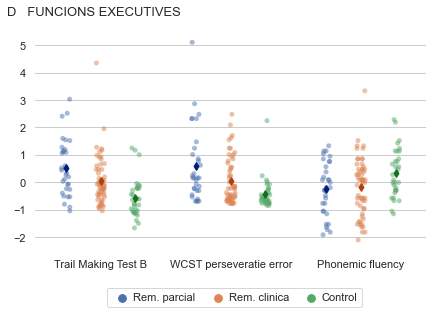

In [83]:
sns.set(rc={"figure.figsize":(7, 4)})
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="test", y="tests", hue="cat",
              data=executive, dodge=True, alpha=.5, zorder=1)#, palette="pastel")

# Show the conditional means
sns.pointplot(x="test", y="tests", hue="cat",
              data=executive, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles[:3],labels[3:],
          handletextpad=0, columnspacing=1,
           bbox_to_anchor=(0.85, -0.15), ncol=3, frameon=True)
ax.set(ylabel="", xlabel="")
ax.set_title('D   FUNCIONS EXECUTIVES', fontsize = 13, y =1.05, x=0.15)

Text(0.15, 1.05, 'E   LLENGUATGE')

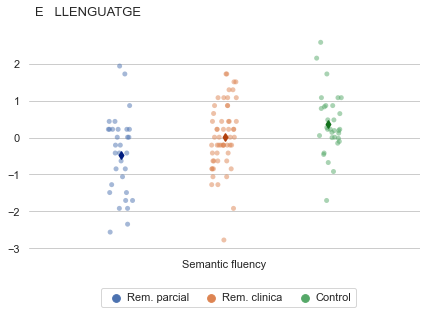

In [84]:
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="test", y="tests", hue="cat",
              data=lleng, dodge=True, alpha=.5, zorder=1)#, palette="pastel")

# Show the conditional means
sns.pointplot(x="test", y="tests", hue="cat",
              data=lleng, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles[:3],labels[3:],
          handletextpad=0, columnspacing=1,
           bbox_to_anchor=(0.85, -0.15), ncol=3, frameon=True)
ax.set(ylabel="", xlabel="")
ax.set_title('E   LLENGUATGE', fontsize = 13, y =1.05, x=0.15)

Text(0.15, 1.05, 'F   VELOCITAT PROCESSAMENT')

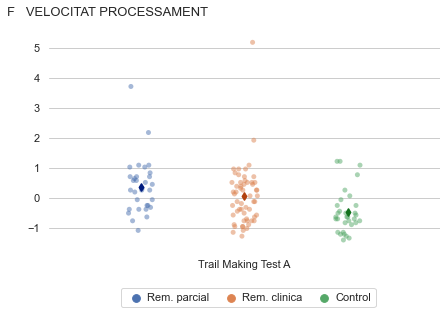

In [85]:
sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="test", y="tests", hue="cat",
              data=speed, dodge=True, alpha=.5, zorder=1)#, palette="pastel")


# Show the conditional means
sns.pointplot(x="test", y="tests", hue="cat",
              data=speed, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles[:3],labels[3:],
          handletextpad=0, columnspacing=1,
           bbox_to_anchor=(0.85, -0.15), ncol=3, frameon=True)
ax.set(ylabel="", xlabel="")
ax.set_title('F   VELOCITAT PROCESSAMENT', fontsize = 13, y =1.05, x=0.15)